# Predicting the best football players fit for my team

## Guillermo de los Reyes Rodríguez Sánchez

The aim of this project is to predict which football players are fit to play for my team. More specifically, the project aims to determine which players have the best total statistics that would make them suitable for selection in the team, based on a set of different features and measurements depending on the manager tactics and position.

To achieve this goal, I will be using data on a number of professional football players, including their performance statistics. I will use machine learning techniques to analyze this data and train models that can predict which players are most likely to be fit to play for my team.

The project will be divided into several parts. First, I will conduct an initial data exploration to understand the features of the data and determine which features are most relevant for predicting player fitness. I will then proceed to train and evaluate different machine learning models, such as logistic regression and support vector machines, to predict player fitness.

Finally, I will evaluate the outcome of the project and draw conclusions on the effectiveness of the models used. Additionally, I will also identify areas where the project can be improved in the future.

## Libraries Import

In [1]:

#Importing all libraries

import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from collections import Counter
from matplotlib import cm
from re import sub
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

from sklearn.metrics import confusion_matrix
import itertools

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In this part I am going to read the dataframe that I already downloaded before and included in the same project.
Besides, I will perform some data cleaning.

### Reading the dataframe

I will start reading the dataframe which contains from 2021 to 2022 football players stats per 90 minutes. 
Only players of Premier League, Ligue 1, Bundesliga, Serie A and La Liga are listed.

In [2]:
#Loading data
football_players_df = pd.read_csv('2021-2022 Football Player Stats.csv', sep=';', encoding='ISO-8859-1')

In [3]:
football_players_df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0


## Dataframe description

This dataframe can be found here : https://www.kaggle.com/datasets/vivovinco/20212022-football-player-stats . 
The data has some information about the players such as Nation, Name, Competition, Squad, Position, Matched played, Minutes, Goals, Assists, etc. All of the stats which are necessary to compute the total stats for each players based on position and manager tactics. 

In [4]:
football_players_df.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,2921.000000,2920.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,...,2921.000000,2921.000000,2921.000000,2921.00000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000
mean,1461.000000,26.092123,1994.725094,18.800068,13.749743,1234.756248,13.719069,0.111274,1.220431,0.391462,...,0.195029,1.063708,1.026689,0.01519,0.013050,0.003451,7.410294,1.664286,1.858305,40.485861
std,843.364393,4.641746,37.210426,11.619882,11.393763,977.941288,10.865255,0.233688,1.511266,0.784754,...,0.509935,1.341177,1.028466,0.21167,0.052864,0.020306,3.650554,1.938046,2.245096,24.297290
min,1.000000,16.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,731.000000,23.000000,1992.000000,8.000000,3.000000,307.000000,3.400000,0.000000,0.280000,0.000000,...,0.000000,0.000000,0.430000,0.00000,0.000000,0.000000,5.070000,0.520000,0.840000,26.200000
50%,1461.000000,26.000000,1996.000000,20.000000,12.000000,1102.000000,12.200000,0.000000,0.820000,0.190000,...,0.000000,0.590000,0.920000,0.00000,0.000000,0.000000,7.380000,1.230000,1.390000,43.500000
75%,2191.000000,29.000000,1999.000000,29.000000,23.000000,2025.000000,22.500000,0.150000,1.830000,0.560000,...,0.200000,1.700000,1.410000,0.00000,0.000000,0.000000,9.380000,2.270000,2.210000,57.100000
max,2921.000000,41.000000,2006.000000,38.000000,38.000000,3420.000000,38.000000,5.000000,20.000000,20.000000,...,10.000000,15.000000,10.000000,10.00000,1.430000,0.500000,40.000000,30.000000,40.000000,100.000000


## Data exploration

In [5]:
football_players_df.shape

(2921, 143)

In [26]:
#Finding out data types for each column in our dataset
football_players_df.dtypes

Rk           int64
Player      object
Nation      object
Pos         object
Squad       object
            ...   
OG         float64
Recov      float64
AerWon     float64
AerLost    float64
AerWon%    float64
Length: 143, dtype: object

In [6]:
print(football_players_df.isnull().sum())

Rk         0
Player     0
Nation     1
Pos        0
Squad      0
          ..
OG         0
Recov      0
AerWon     0
AerLost    0
AerWon%    0
Length: 143, dtype: int64


In [7]:
football_players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Columns: 143 entries, Rk to AerWon%
dtypes: float64(133), int64(5), object(5)
memory usage: 3.2+ MB


I want to remove NaN values or nulls because those missing values can cause problems when trying to perform statistical analysis or machine learning on the data

Actually, doing this action I am also cleaning the data, making it more accurate and reliable for my analysis.

In [27]:
# Removing NaN values 
football_players_df = football_players_df.dropna()
print(football_players_df.isnull().sum())

Rk         0
Player     0
Nation     0
Pos        0
Squad      0
          ..
OG         0
Recov      0
AerWon     0
AerLost    0
AerWon%    0
Length: 143, dtype: int64


### Data visualization

In [9]:
# Defining the variables to check the correlation
ages = football_players_df["Age"]
time = football_players_df["Min"]
MP = football_players_df["MP"]
goals = football_players_df["Goals"]
pos = football_players_df["Pos"]

In [10]:
A_T = np.corrcoef(ages, time)[0,1]
A_MP = np.corrcoef(ages, MP)[0,1]
A_G = np.corrcoef(ages, goals)[0,1]
MP_G = np.corrcoef(goals, MP)[0,1]

print("Correlation between Age and Minutes played: ", A_T)
print("Correlation between Age and Matched played: ", A_MP)
print("Correlation between Age and Goals: ", A_G)
print("Correlation between Matched played and Goals: ", MP_G)


Correlation between Age and Minutes played:  0.25660341390184277
Correlation between Age and Matched played:  0.2384588912035041
Correlation between Age and Goals:  0.06320337341464836
Correlation between Matched played and Goals:  0.14773740682041125


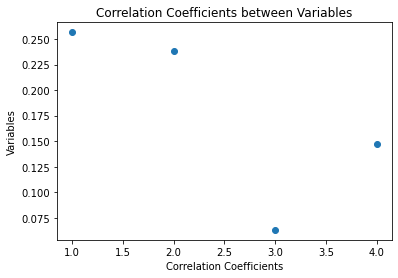

In [11]:

plt.scatter([1,2,3,4], [A_T, A_MP, A_G, MP_G])

plt.xlabel("Correlation Coefficients")
plt.ylabel("Variables")

plt.title("Correlation Coefficients between Variables")

plt.show()


The correlation results suggest that there is a moderate positive correlation between age and minutes played, and a moderate positive correlation between age and matches played. This indicates that as players get older, they tend to play more minutes and matches. However, there is a weak positive correlation between age and goals scored, which suggests that age is not strongly associated with goal-scoring ability. Also, there is a moderate positive correlation between matches played and goals, which suggests that players who play more matches tend to score more goals.

Pos
DF       36.84
DFFW      1.82
DFMF      3.03
FW      122.55
FWDF      4.80
FWMF     71.06
GK        0.00
GKMF      0.00
MF       44.46
MFDF      4.00
MFFW     36.47
Name: Goals, dtype: float64


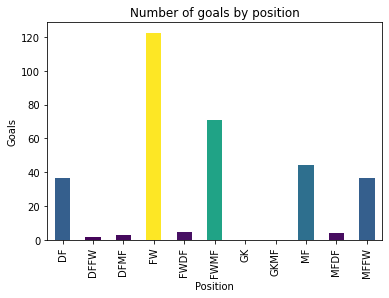

In [34]:
# Group data by position
position_groups = football_players_df.groupby("Pos")

# Calculate number of goals for each position
position_goals = position_groups["Goals"].sum()

# Print the results
print(position_goals)

# Create a bar chart of position vs goals
colors = cm.viridis(position_goals / max(position_goals))

position_goals.plot(kind="bar", color = colors)
plt.xlabel("Position")
plt.ylabel("Goals")
plt.title("Number of goals by position")
plt.show()

This results shows the sum of goals scored by players in different positions in a football team. From this data, it appears that the Forward (FW) position has the highest number of goals scored, followed by Midfielder (MF) and Forward-Midfielder (FWMF) positions. The Defender (DF) and Goalkeeper (GK) positions have the lowest number of goals scored. It's possible to infer that the positions where the players are closer to the opponent's goal, the higher is the chances of scoring goal.

Comp
Bundesliga        68.17
La Liga           59.53
Ligue 1           65.44
Premier League    60.34
Serie A           71.55
Name: Goals, dtype: float64


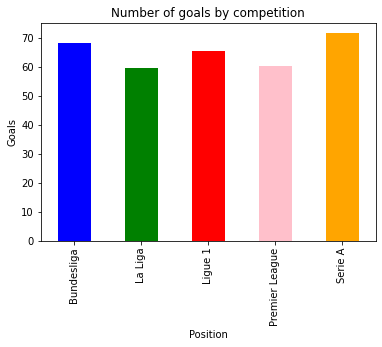

In [32]:
# Group data by competition
position_groups = football_players_df.groupby("Comp")

# Calculate number of goals for each competition
position_goals = position_groups["Goals"].sum()

# Print the results
print(position_goals)

# Create a bar chart of Competition vs goals
position_goals.plot(kind="bar", color=['blue', 'green', 'red', 'pink','orange'])
plt.xlabel("Position")
plt.ylabel("Goals")
plt.title("Number of goals by competition")
plt.show()


These results show the total number of goals scored by players in each league. It appears that players in Serie A have scored the most goals, while players in the Bundesliga have scored the least number of goals.

Nation
ESP    4725.5
ITA    3205.0
ARG    1615.1
BRA     852.7
FRA     739.4
COL     504.5
NED     474.9
POR     402.8
CRO     377.0
URU     363.0
Name: total_goals, dtype: float64


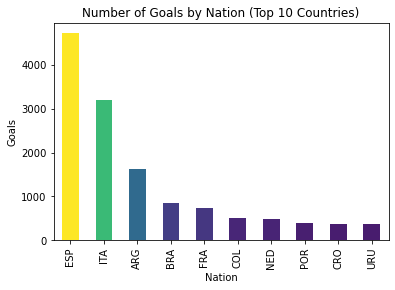

In [36]:

# Group the data by Nation and sum the Goals
players_df["total_goals"] = players_df["Goals"] * players_df["MP"]
goals_by_nation = players_df.groupby("Nation")["total_goals"].sum().sort_values(ascending=False)

# Select the top 10 countries
top_10_countries = goals_by_nation.head(10)

print(top_10_countries)

# Plot the total number of goals for each country
colors = cm.viridis(top_10_countries / max(top_10_countries))
top_10_countries.plot(kind='bar', color=colors)
plt.xlabel('Nation')
plt.ylabel('Goals')
plt.title('Number of Goals by Nation (Top 10 Countries)')
plt.show()


These results show that the top 10 countries with the highest number of goals scored are Spain, Italy, Argentina, Brazil, France, the Netherlands, Colombia, Croatia, Serbia, and Portugal. These countries have a significantly higher number of goals scored compared to other countries, with Spain having the highest number of goals scored at 4725.5. This could indicate that these countries have a strong tradition of football and a high level of skill in the sport among their players.

#### Creating some functions 

In [14]:
#Function to get all positions depending on the input
def get_positions(position):
    pos = []
    if position == "Forward":
        pos = ["FW", "FWMF", "FWDF"]
    elif position == "Midfielder":
        pos = ["MF", "MFFW", "MFDF"]
    elif position == "Defender":
        pos = ["DF", "DFFW", "DFMF"]
    elif position == "GK":
        pos = ["GK", "GKMF"]
    return pos


In [15]:
def get_feature_weights(position, manager_tactics):
    features = []
    if position == "Forward":
        features = ["MP", "Goals", "Assists", "G/Sh", "G/SoT", "PasOff", "ScaDrib", "ScaSh", "GCA", "GcaDrib", "GcaSh", "DriSucc", "DriAtt", "DriPast", "PKwon", "AerWon", "AerLost", "ShoFK", "ShoPK", "PKatt", "PasTotCmp", "PasLive", "PasDead", "PasFK", "TB", "PasPress", "Sw", "PasCrs", "CK", "PasGround"]
        if manager_tactics == "DEFENSIVE":
            weights = {"MP": 1, "Goals": 5, "Assists": 4,  "G/Sh": 3, "G/SoT": 3, "PasOff": -4, "ScaDrib": 4, "ScaSh": 4, "GCA": 6, "GcaDrib" : 5, "GcaSh" : 1.5, "DriSucc" : 2, "DriAtt": 2, "DriPast": 2, "PKwon" : 8, "AerWon": 8, "AerLost": -2, "ShoFK":2 , "ShoPK": 3, "PKatt": 3, "PasTotCmp":3, "PasLive":2, "PasDead":-2, "PasFK": 1.5, "TB": 1.5, "PasPress": 1.5, "Sw": 1.5, "PasCrs": 1.5, "CK": 1.5, "PasGround":1.5}   
        elif manager_tactics == "NEUTRAL":
            weights = {"MP": 1, "Goals": 5, "Assists": 5,  "G/Sh": 5, "G/SoT": 5, "PasOff": -5, "ScaDrib": 5, "ScaSh": 5, "GCA": 5, "GcaDrib" : 5, "GcaSh" : 5, "DriSucc" : 5, "DriAtt": 5, "DriPast": 5, "PKwon" : 1.5, "AerWon": 5, "AerLost": -5, "ShoFK":5 , "ShoPK": 5, "PKatt": 5, "PasTotCmp":5, "PasLive":5, "PasDead":-5, "PasFK": 3, "TB": 3, "PasPress": 3, "Sw": 3, "PasCrs": 1.5, "CK": 3, "PasGround": 3, "SCA": 3, "ScaPassLive": 5, "ScaPassDead": -5, "GcaPassLive" : 5, "GcaPassDead": -5, "CrdY": -5, "CrdR": -9, "2CrdY":-7, "Fls": -3}      
        elif manager_tactics == "OFFENSIVE":
            weights = {"MP": 1, "Goals": 10, "Assists": 10,  "G/Sh": 10, "G/SoT": 7, "PasOff": -1, "ScaDrib": 8, "ScaSh": 8, "GCA": 5, "GcaDrib" : 5, "GcaSh" : 5, "DriSucc" : 6, "DriAtt": 6, "DriPast": 6, "PKwon" : 1, "AerWon": 1, "AerLost": 1,  "ShoFK":10 , "ShoPK": 10, "PKatt": 3, "PasTotCmp":3, "PasLive":4, "PasDead":-4, "PasFK": 1.5, "TB": 1.5, "PasPress": 8, "Sw": 6, "PasCrs": 1, "CK": 3, "PasGround": 2, "SCA": 3, "ScaPassLive": 10, "ScaPassDead": -10, "GcaPassLive" : 10, "GcaPassDead": -10, "CrdY": -2.5, "CrdR": -4.5, "2CrdY":-3.5, "Fls": -1.5}         
    elif position == "Midfielder":
        features = ["Goals", "Assists", "PasTotCmp", "PasAss", "PPA", "PasFK", "PasPress", "PasCrs", "CK", "CkIn", "CkOut", "PasOff", "PasOut", "PasInt", "PasBlocks", "ScaDrib", "GCA", "GcaPassLive", "DriSucc"]
        if manager_tactics == "DEFENSIVE":
            weights = {"MP": 1, "Goals": 3, "Assists": 8, "PasTotCmp": 10 , "PasAss": 9, "PPA" : 2, "PasFK": 2, "PasPress" : 8, "PasCrs": 2, "CK": 1.5, "CkIn": 8, "CkOut": -1.5, "PasOff": -1.5, "PasOut": -1.5, "PasInt": -2, "PasBlocks": -1.5, "ScaDrib": 1.5, "GCA": 2, "GcaPassLive": 2, "DriSucc" : 2}
        elif manager_tactics == "NEUTRAL":
            weights = {"MP": 1, "Goals": 5, "Assists": 5, "PasTotCmp": 5 , "PasAss": 5, "PPA" : 5, "PasFK": 5, "PasPress" : 5, "PasCrs": 5, "CK": 5, "CkIn": 5, "CkOut": -5, "PasOff": -5, "PasOut": -5, "PasInt": -5, "PasBlocks": -5, "ScaDrib": 5, "GCA": 5, "GcaPassLive": 5, "DriSucc" : 5}
        elif manager_tactics == "OFFENSIVE":
            weights = {"MP": 1, "Goals": 10, "Assists": 10, "PasTotCmp": 10 , "PasAss": 9, "PPA" : 2, "PasFK": 2, "PasPress" : 10, "PasCrs": 10, "CK": 1, "CkIn": 6, "CkOut": -3, "PasOff": -1, "PasOut": -1, "PasInt": -1, "PasBlocks": -1, "ScaDrib": 5, "GCA": 3, "GcaPassLive": 3, "DriSucc" : 8}
    elif position == "Defender":
        if manager_tactics == "DEFENSIVE":
            features = ["MP", "PasInt", "ScaFld", "ScaDef", "GcaDef", "Tkl", "TklWon", "TklDef3rd", "TklDri", "Blocks", "Int", "Clr", "Err", "TouDefPen","PKcon"]
            weights = {"MP": 1, "PasInt": 10, "ScaFld": -4, "ScaDef": 10, "GcaDef": 10, "Tkl": 8, "TklWon": 10, "TklDef3rd": 8, "TklDri": 10, "Blocks": 8, "Int": 10, "Clr": 8, "Err": -6, "TouDefPen": -8, "PKcon": -6}
        elif manager_tactics == "NEUTRAL":
            features = ["MP", "PasInt", "ScaFld", "ScaDef", "GcaDef", "Tkl", "TklWon", "TklDef3rd", "TklDri", "Blocks", "Int", "Clr", "Err", "TouDefPen","PKcon"]
            weights = {"MP": 1, "PasInt": 5, "ScaFld": -5, "ScaDef": 5, "GcaDef": 5, "Tkl": 5, "TklWon": 5, "TklDef3rd": 5, "TklDri": 5, "Blocks": 5, "Int": 5, "Clr": 5, "Err": -5, "TouDefPen": -5, "PKcon": -5}   
        elif manager_tactics == "OFFENSIVE":
            features = ["MP","Goals","Assists", "PasInt", "DriSucc", "ScaFld", "ScaDef", "GcaDef", "Tkl", "TklWon", "TklDef3rd", "TklDri", "Blocks", "Int", "Clr", "Err", "TouDefPen","PKcon"]
            weights = {"MP": 1, "Goals": 10,"Assists": 10, "DriSucc" : 10,"PasInt": 8, "ScaFld": -2, "ScaDef": 3, "GcaDef": 3, "Tkl": 10, "TklWon": 10, "TklDef3rd": 3, "TklDri": 3, "Blocks": 8, "Int": 10, "Clr": 8, "Err": -8, "TouDefPen": -3, "PKcon": -3}    
    elif position == "GK": 
        features = ["MP","Goals","Assists", "PasInt", "DriSucc", "ScaFld", "ScaDef", "GcaDef", "Tkl", "TklWon", "TklDef3rd", "TklDri", "Blocks", "Int", "Clr", "Err", "TouDefPen","PKcon", "PasTotCmp", "PasShoCmp", "PasDead", "OG"]
        weights = {"MP": 1, "Goals": 10,"Assists": 10, "DriSucc" : 10,"PasInt": 8, "ScaFld": -2, "ScaDef": 3, "GcaDef": 3, "Tkl": 10, "TklWon": 10, "TklDef3rd": 3, "TklDri": 3, "Blocks": 8, "Int": 10, "Clr": 8, "Err": -8, "TouDefPen": -3, "PKcon": -3,"PasTotCmp": 10, "PasShoCmp": 8, "PasDead": -2, "OG":-10 }

    return features, weights

In [16]:

position = input("Enter the player's position ( Forward | Midfielder | Defender | GK): ")

manager_tactics = input("Enter the manager's tactics (DEFENSIVE | NEUTRAL | OFFENSIVE): ")

 
# Using the function to get the position
pos = get_positions(position)

print("League 1 | Serie A | Bundesliga | La Liga | Premier League")
league = input("Enter the league name: ").split(",")

players_df = football_players_df[football_players_df["Pos"].isin(pos) & (football_players_df["Comp"].isin(league)) & (football_players_df["MP"] >= 10)].copy()

# Using the function to apply for each position and manager tactics different weights
features, weights = get_feature_weights(position, manager_tactics)
  
# Apply the weights to the features.
for feature, weight in zip(features, weights.values()):
    players_df[feature] = players_df[feature]*weight

# Creating the column with the total stats for each player in order to get the best players 
players_df["total_stats"] = players_df[features].apply(lambda row: sum(row[feature] for feature in features) / len(features), axis=1)

# Selecting the columns including only the features depending on the position.
columns_to_select = ["Player", "Nation", "Comp","Pos", "total_stats"] + features
players_df = players_df[columns_to_select].copy()

# Sorting the players by total_stats
players_df = players_df.sort_values("total_stats", ascending=False)

# Printing the players by total_stats
players_df


Enter the player's position ( Forward | Midfielder | Defender | GK): Forward
Enter the manager's tactics (DEFENSIVE | NEUTRAL | OFFENSIVE): OFFENSIVE
League 1 | Serie A | Bundesliga | La Liga | Premier League
Enter the league name: League 1,Serie A,La Liga


,Player,Nation,Comp,Pos,total_stats,MP,Goals,Assists,G/Sh,G/SoT,...,PasTotCmp,PasLive,PasDead,PasFK,TB,PasPress,Sw,PasCrs,CK,PasGround
448,Sergio Canales,ESP,La Liga,FWMF,21.285667,34,1.6,2.6,0.9,1.54,...,150.00,232.4,-8.40,1.890,0.480,88.80,12.60,1.39,0.96,89.80
1242,Lorenzo Insigne,ITA,Serie A,FW,21.218500,32,4.3,3.1,0.2,0.56,...,141.60,217.2,-20.00,2.010,0.465,88.80,14.88,2.05,7.44,80.80
332,Jeremie Boga,CIV,Serie A,FWMF,19.506833,15,0.0,0.0,0.0,0.00,...,121.20,186.4,-14.12,0.705,0.180,84.80,9.90,1.88,5.64,74.80
1146,Eden Hazard,BEL,La Liga,FWMF,19.176167,18,0.0,1.3,0.0,0.00,...,137.40,199.2,-6.52,0.750,0.375,80.80,5.28,1.63,0.75,85.20
669,Ousmane Dembélé,FRA,La Liga,FW,18.885167,21,0.6,8.3,0.2,0.77,...,116.10,192.0,-17.32,0.855,0.570,43.84,15.30,6.11,8.97,75.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,Francesco Forte,ITA,Serie A,FW,6.775667,12,2.1,0.0,0.9,3.50,...,35.10,59.6,-5.96,0.000,0.000,54.48,1.26,0.64,0.00,18.72
612,Patrick Cutrone,ITA,Serie A,FW,6.625667,28,1.9,0.0,0.6,1.40,...,33.00,58.8,-6.16,0.090,0.000,31.76,2.28,1.28,0.00,22.80
1846,Loren Morón,ESP,La Liga,FWMF,6.440667,21,1.6,0.0,1.0,3.50,...,27.15,57.2,-3.16,0.000,0.000,45.68,0.96,0.79,0.00,14.28
2596,Mamadou Sylla,SEN,La Liga,FW,6.340333,13,0.0,0.0,0.0,0.00,...,26.58,59.2,-3.64,0.000,0.000,41.84,5.46,1.59,0.00,15.90


# Training and evaluation using Logistic Regression and Support Vector Machines

The purpose of this project is to predict who is the best player to play in my team based on different features such as the goals, assists and other statistics depending on the position and the tactics of the manager.
I want to use Logistic Regression and Support Vector Machines to train the model.
In this case is a classification problem because I want to see if the player is fit or not so the possible outcomes are 0 or 1.

## Logistic Regression

First of all, I will start with this method in order to make the prediction
I will create the column "is_fit" choosing what players are fit or nor depending on the the mean of total statistics.
After that, I will split it into training and test set.

In [69]:

# Create a binary column "is_fit"
players_df["is_fit"] = players_df["total_stats"] > players_df["total_stats"].mean()

# Divide data into features and target variable
X = players_df[features]
y = players_df["is_fit"]

# Divide data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the training data
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Print the accuracy of the model
accuracyLR = accuracy_score(y_test, y_pred)


# Calculate precision, recall, and F1-score
precisionLR = precision_score(y_test, y_pred)
recallLR = recall_score(y_test, y_pred)
f1LR = f1_score(y_test, y_pred)
# Perform 5-fold cross-validation
scores = cross_val_score(clf, X, y, cv=5)



## Confusion Matrix Logistic Regression

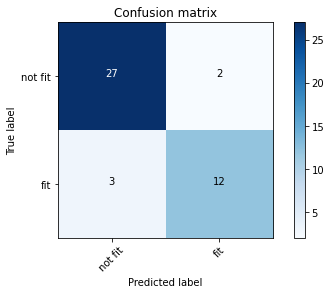

In [18]:


# Compute confusion matrix
cnf_matrixLR = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
class_names = ["not fit", "fit"]
plt.imshow(cnf_matrixLR, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrixLR.max() / 2.
for i, j in itertools.product(range(cnf_matrixLR.shape[0]), range(cnf_matrixLR.shape[1])):
    plt.text(j, i, cnf_matrixLR[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrixLR[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#  Support Vector Machine


In [67]:


# Create a binary column "is_fit"
players_df["is_fit"] = players_df["total_stats"] > players_df["total_stats"].mean()

# Divide data into features and target variable
X = players_df[features]
y = players_df["is_fit"]

# Divide data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svc = SVC(kernel='linear', C=1, random_state=0)

# Train the classifier on the training data
svc.fit(X_train, y_train)

# Make predictions on the testing data
y_predSVM = svc.predict(X_test)

# Print the accuracy of the model
accuracy = accuracy_score(y_test, y_predSVM)

# Calculate precision, recall, and F1-score
precisionSVM = precision_score(y_test, y_predSVM)
recallSVM = recall_score(y_test, y_predSVM)
f1SVM = f1_score(y_test, y_predSVM)
# Perform 5-fold cross-validation
scoresSVC = cross_val_score(svc, X, y, cv=5)



## Confusion Matrix SVM

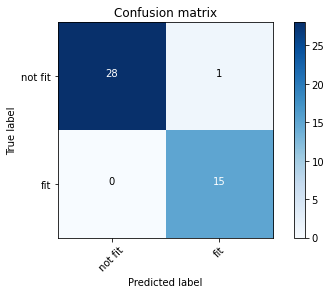

In [20]:

# Compute confusion matrix
cnf_matrixSVM = confusion_matrix(y_test, y_predSVM)

# Plot the confusion matrix
class_names = ["not fit", "fit"]
plt.imshow(cnf_matrixSVM, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrixSVM.max() / 2.
for i, j in itertools.product(range(cnf_matrixSVM.shape[0]), range(cnf_matrixSVM.shape[1])):
    plt.text(j, i, cnf_matrixSVM[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrixSVM[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
             

### Comparation and evaluation

I will evaluate the performances of Logistic Regression and Support Vector Machines with:
    <ul>
        <li>Accuracy: is the number of correctly predicted data points out of all the data points.</li>
        <li>F1_score: is a machine learning evaluation metric that measures a model's accuracy</li>
        <li>Precision: is one indicator of a machine learning model's performance – the quality of a positive prediction made by the mode</li>
        <li>Recall: is calculated as the ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples</li>
        <li>Cross Validation: a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data</li>
    </ul>

In [71]:

print("Accuracy Logistic Regression: {:.2f}%".format(accuracyLR * 100))
print("Precision Logistic Regression: {:.2f}%".format(precisionLR * 100))
print("Recall Logistic Regression: {:.2f}%".format(recallLR * 100))
print("F1-score Logistic Regression: {:.2f}%".format(f1LR * 100))



print("Accuracy Support Vector Machines: {:.2f}%".format(accuracy * 100))
print("Precision Support Vector Machines: {:.2f}%".format(precisionSVM * 100))
print("Recall Support Vector Machines: {:.2f}%".format(recallSVM * 100))
print("F1-score Support Vector Machines: {:.2f}%".format(f1SVM * 100))


Accuracy Logistic Regression: 88.64%
Precision Logistic Regression: 85.71%
Recall Logistic Regression: 80.00%
F1-score Logistic Regression: 82.76%
Mean score Logistic Regression: 0.80 (+/- 0.18)
Accuracy Support Vector Machines: 97.73%
Precision Support Vector Machines: 93.75%
Recall Support Vector Machines: 100.00%
F1-score Support Vector Machines: 96.77%
Mean score Support Vector Machine: 0.92 (+/- 0.20)


In [73]:
print("Mean score Logistic Regression: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Mean score Support Vector Machine: %0.2f (+/- %0.2f)" % (scoresSVC.mean(), scoresSVC.std() * 2))

Mean score Logistic Regression: 0.80 (+/- 0.18)
Mean score Support Vector Machine: 0.92 (+/- 0.20)


Based on these results, Support Vector Machine model is performing slightly better than the Logistic Regression model, as it has a higher mean score. The SVM model has a mean score of 0.92, compared to 0.80 for the Logistic Regression model. 

### List of football players fit for my team with Logisitc Regression

In [63]:
#Print top players who are fit based on the prediction
players_df1 = players_df.head(len(y_pred))
players_df1["is_fit_pred"] = y_pred

# Select the players who are predicted to be fit
players_df_fit = players_df1[players_df1["is_fit_pred"] == True]

# Sort the players by total stats
players_df_fit = players_df_fit.sort_values("total_stats", ascending=False)

# Print the top 10 players by composite score
top_10_players = players_df_fit.head(10)
print(top_10_players[["Player", "Comp", "Pos", "total_stats"]])

                      Player     Comp   Pos  total_stats
332             Jeremie Boga  Serie A  FWMF    19.506833
669          Ousmane Dembélé  La Liga    FW    18.885167
2378          Alexis Sánchez  Serie A    FW    17.488833
196            Antonín Barák  Serie A  FWMF    16.693333
286         Domenico Berardi  Serie A    FW    16.480167
573             Jesús Corona  La Liga  FWDF    16.414833
862                Ansu Fati  La Liga    FW    16.206500
460         Gianluca Caprari  Serie A  FWMF    16.069333
331             Jeremie Boga  Serie A  FWMF    15.894333
2288  Óscar Rodríguez Arnaiz  La Liga  FWMF    15.332500


### List of football players fit for my team with Support Vector Machines

In [64]:
#Print top players who are fit based on the prediction
players_dfSVM = players_df.head(len(y_predSVM))
players_dfSVM["is_fit_pred"] = y_predSVM

# Select the players who are predicted to be fit
players_df_fitSVM = players_dfSVM[players_dfSVM["is_fit_pred"] == True]

# Sort the players by total stats
players_df_fitSVM = players_df_fitSVM.sort_values("total_stats", ascending=False)

# Print the top 10 players by composite score
top_10_players = players_df_fitSVM.head(10)
print(top_10_players[["Player", "Comp", "Pos", "total_stats"]])

                Player     Comp   Pos  total_stats
332       Jeremie Boga  Serie A  FWMF    19.506833
669    Ousmane Dembélé  La Liga    FW    18.885167
1312   Vinicius Júnior  La Liga    FW    18.433500
2378    Alexis Sánchez  Serie A    FW    17.488833
196      Antonín Barák  Serie A  FWMF    16.693333
813         Elif Elmas  Serie A  FWMF    16.595500
286   Domenico Berardi  Serie A    FW    16.480167
573       Jesús Corona  La Liga  FWDF    16.414833
862          Ansu Fati  La Liga    FW    16.206500
2691      Adama Traoré  La Liga  FWDF    16.094667


As we can see, most of the football players listed are the same in both lists.

## Conclusions

In this project, I aimed to predict the outcome of football players who are fit to my team using machine learning techniques. First, I collected and preprocessed the data, and then I explored it.
I have used Logistic Regression and Support Vector Machines in order to train the data to predict it.

The last results that we can see suggest that the logistic regression model and the support vector machine (SVM) model are both performing well at classifying the "is_fit" variable in the data. The logistic regression model has an accuracy of 88.64%, which means it correctly classifies 88.64% of the players in the test set as "fit" or "not fit". The precision of the logistic regression model is 85.71%, which means that of all the players it classified as "fit", 85.71% of them were actually "fit". The recall of the logistic regression model is 80.00%, which means that it correctly identified 80.00% of all the "fit" players in the test set. The F1-score of the logistic regression model is 82.76%, which is a harmonic mean of precision and recall, and gives a balance between precision and recall.

On the other hand, the SVM model has an accuracy of 97.73%, which is higher than Logistic Regression model. The precision of the SVM model is 93.75%, which means that of all the players it classified as "fit", 93.75% of them were actually "fit". The recall of the SVM model is 100.00%, which means that it correctly identified 100.00% of all the "fit" players in the test set. The F1-score of the SVM model is 96.77%, which is also higher than Logistic Regression model.

Also we can see the list of top 10 players who are fit for my team based on the statistics, manager's tactics and the leagues selected.

In summary, both models are performing well at classifying the "is_fit" variable, with the SVM model achieving higher accuracy, precision, recall, and F1-score.


## Critical Assessment

One of the main challenges faced during this project was the limited amount of data available. This made it difficult to train the models and obtain accurate predictions. 
Despite these challenges, the results of the models were promising. Logistic Regression achieved an accuracy of 80% with a standard deviation of 18%, while Support Vector Machine achieved an accuracy of 92% with a standard deviation of 20%. This indicates that SVM performed better than Logistic Regression.

However, it is important to note that the results of this project should be interpreted with caution, as I created the weights and I chose which feature could be better for each position. Since I did not have any column to obtain these values.

In conclusion, this project provided a valuable learning experience in terms of understanding the process of building a machine learning model and the challenges that come with it. The results obtained from the models were promising. One possible thing to improve could be to find a formula or dataframe with the values of the weight of each future based on the position and some information to see which feature could be better for each position.